In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("adult.csv") 

In [6]:
df.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 1. Univariate Analysis


In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.isnull().sum() 


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Categorical variable

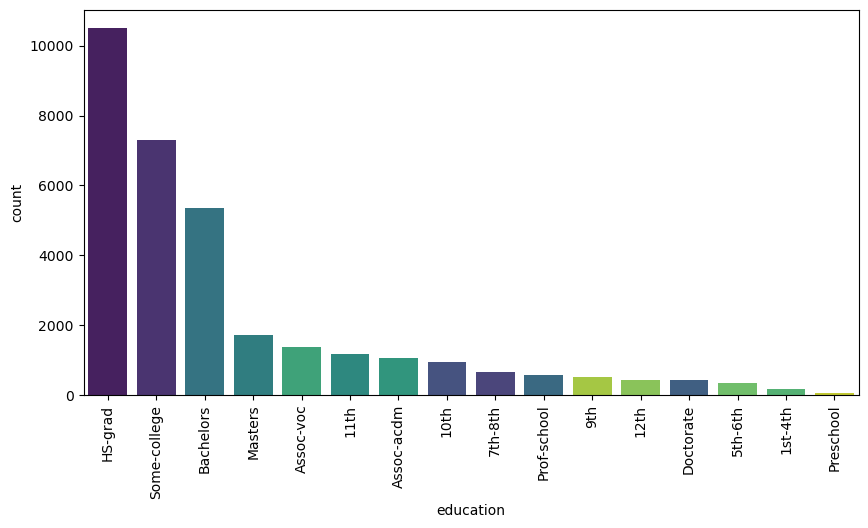

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["education"], order=df["education"].value_counts().index, hue=df["education"], palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.show()


#### This data shows :
#### High school graduation (HS-grad) is the most common education level.
#### Higher education (Bachelor’s, Master’s, Doctorate) is less common.
#### Lower education levels (Preschool, 1st-8th grade) have very few individuals.
#### The trend shows that as education level increases, the number of individuals decreases.

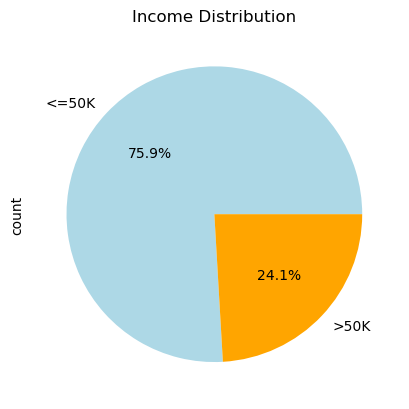

In [17]:
df["income"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Income Distribution")
plt.show()


#### Conclusion:
#### Majority of individuals earn ≤50K.
#### Fewer people belong to the >50K income group.
#### The dataset is imbalanced toward lower-income individuals.

## Numerical variable


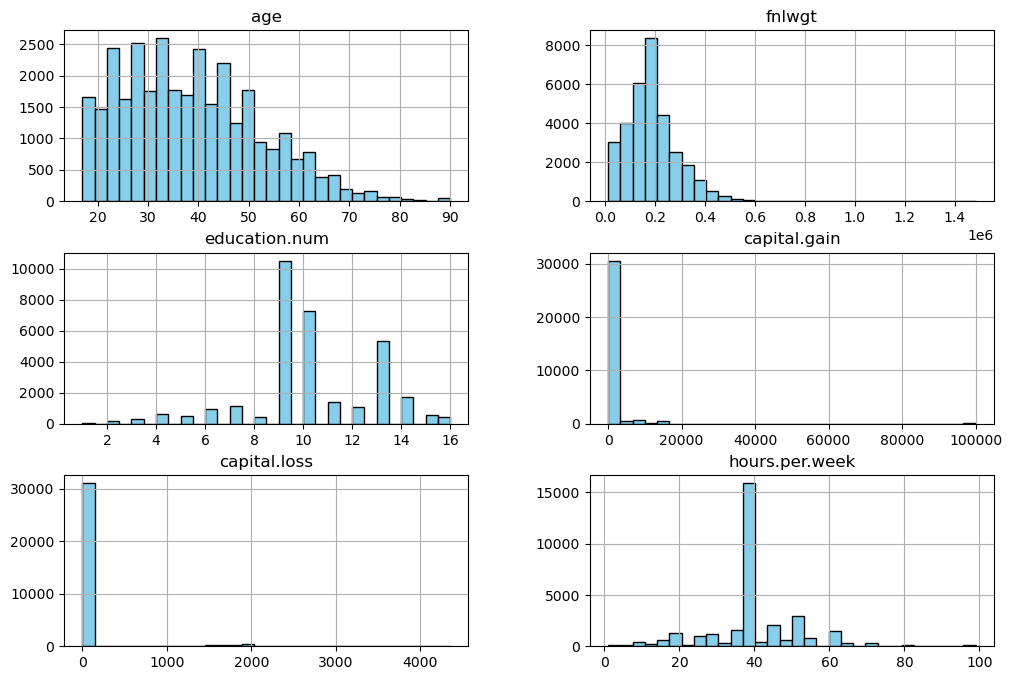

In [20]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black")
plt.show()


#### Conclusion:
#### Numerical variables show varied distributions.
#### Age and hours-per-week are right-skewed, meaning most values are on the lower side.
#### Capital-gain and capital-loss have highly skewed distributions, with most values near zero.

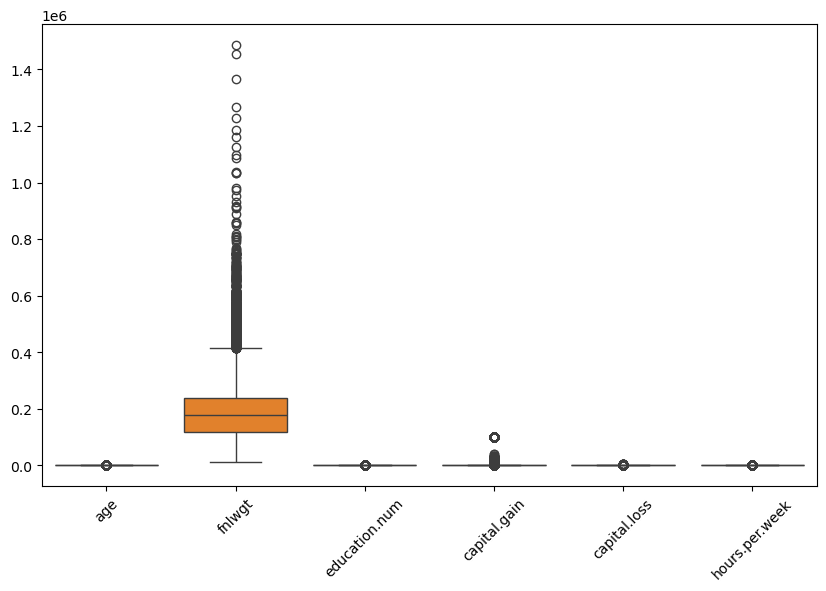

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]])
plt.xticks(rotation=45)
plt.show()


#### Conclusion from Boxplot:
#### fnlwgt (final weight) has extreme outliers, indicating a highly skewed distribution.
#### Capital-gain and capital-loss also have outliers, suggesting that most values are concentrated near zero with a few high values.
#### Age, education-num, and hours-per-week show relatively fewer outliers, meaning their distributions are more compact.

## Multivariate analysis


### Numerical variable
### Correlation


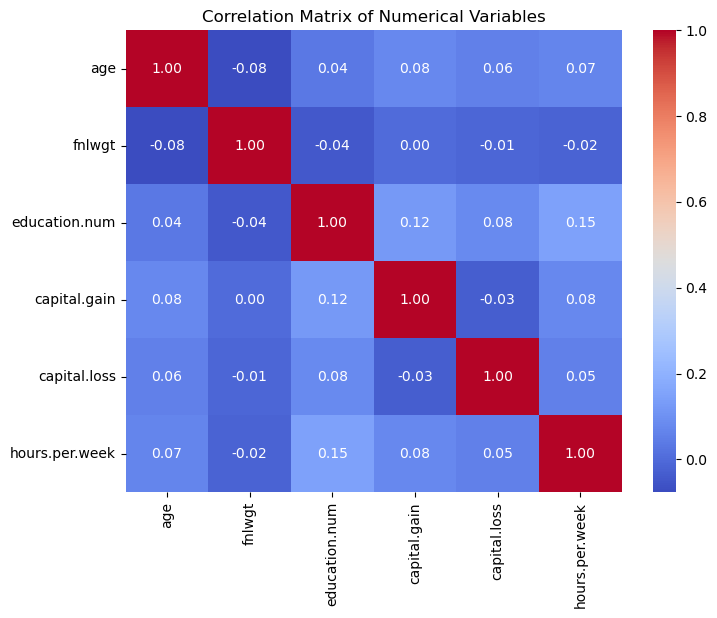

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


#### Conclusion
#### Weak correlations among most numerical variables, meaning they are largely independent.

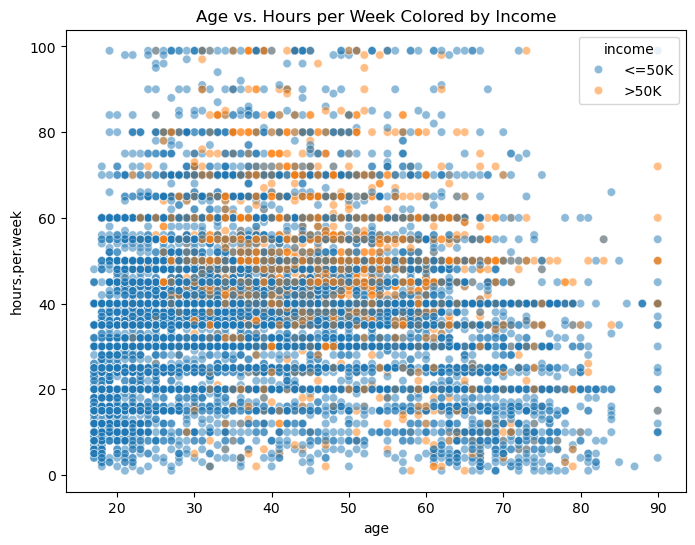

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="age",
    y="hours.per.week",
    hue="income",  # color points by income group
    data=df,
    alpha=0.5
)
plt.title("Age vs. Hours per Week Colored by Income")
plt.show()


#### Conclusion:
#### No clear pattern between age and hours worked per week—people across all ages work varying hours.
#### Income-based separation: Higher-income individuals may work slightly more hours, but overlap exists.
#### Diverse distribution: Both income groups are spread across different work hours and ages.

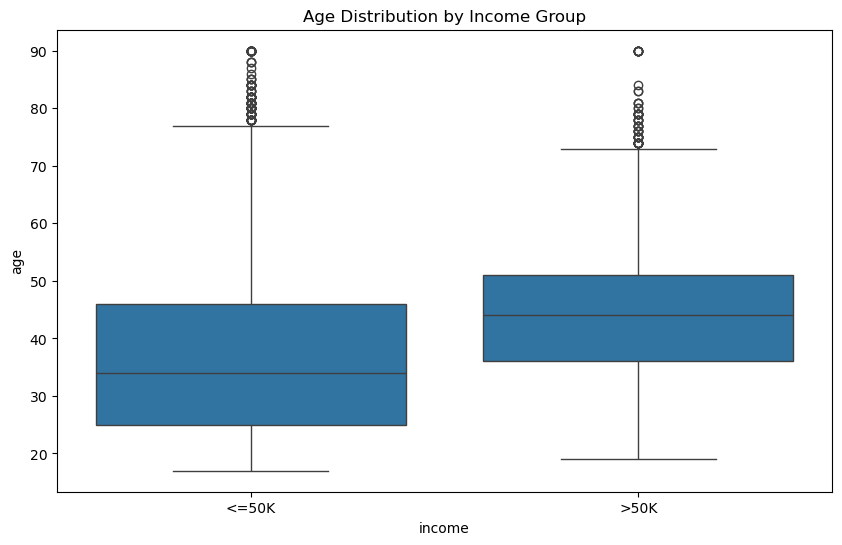

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Age Distribution by Income Group")
plt.show()


#### Conclusion:
#### Higher-income individuals tend to be older on average compared to lower-income individuals.
#### The age range for both income groups overlaps significantly.
#### There are some outliers in both groups, indicating variation in ages for different income levels.

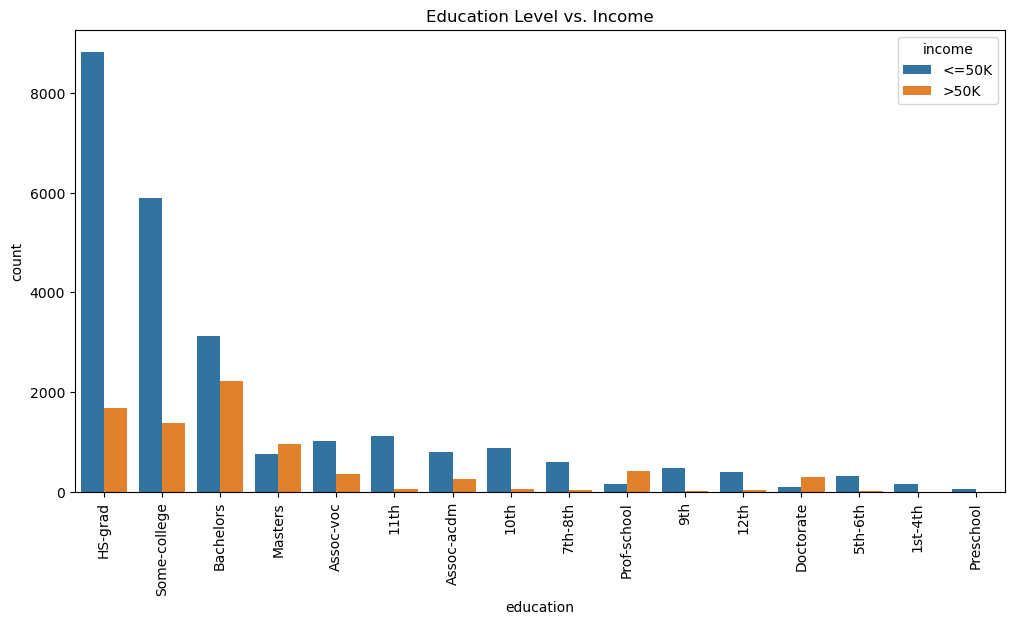

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x="education",
    hue="income",
    data=df,
    order=df["education"].value_counts().index
)
plt.xticks(rotation=90)
plt.title("Education Level vs. Income")
plt.show()


#### Conclusion:
#### Higher education levels generally correspond to a higher proportion of individuals earning more income.
#### Lower education levels have a larger share of individuals in the lower-income category.
#### Some education levels show a mix of both income groups, indicating variability in income distribution.

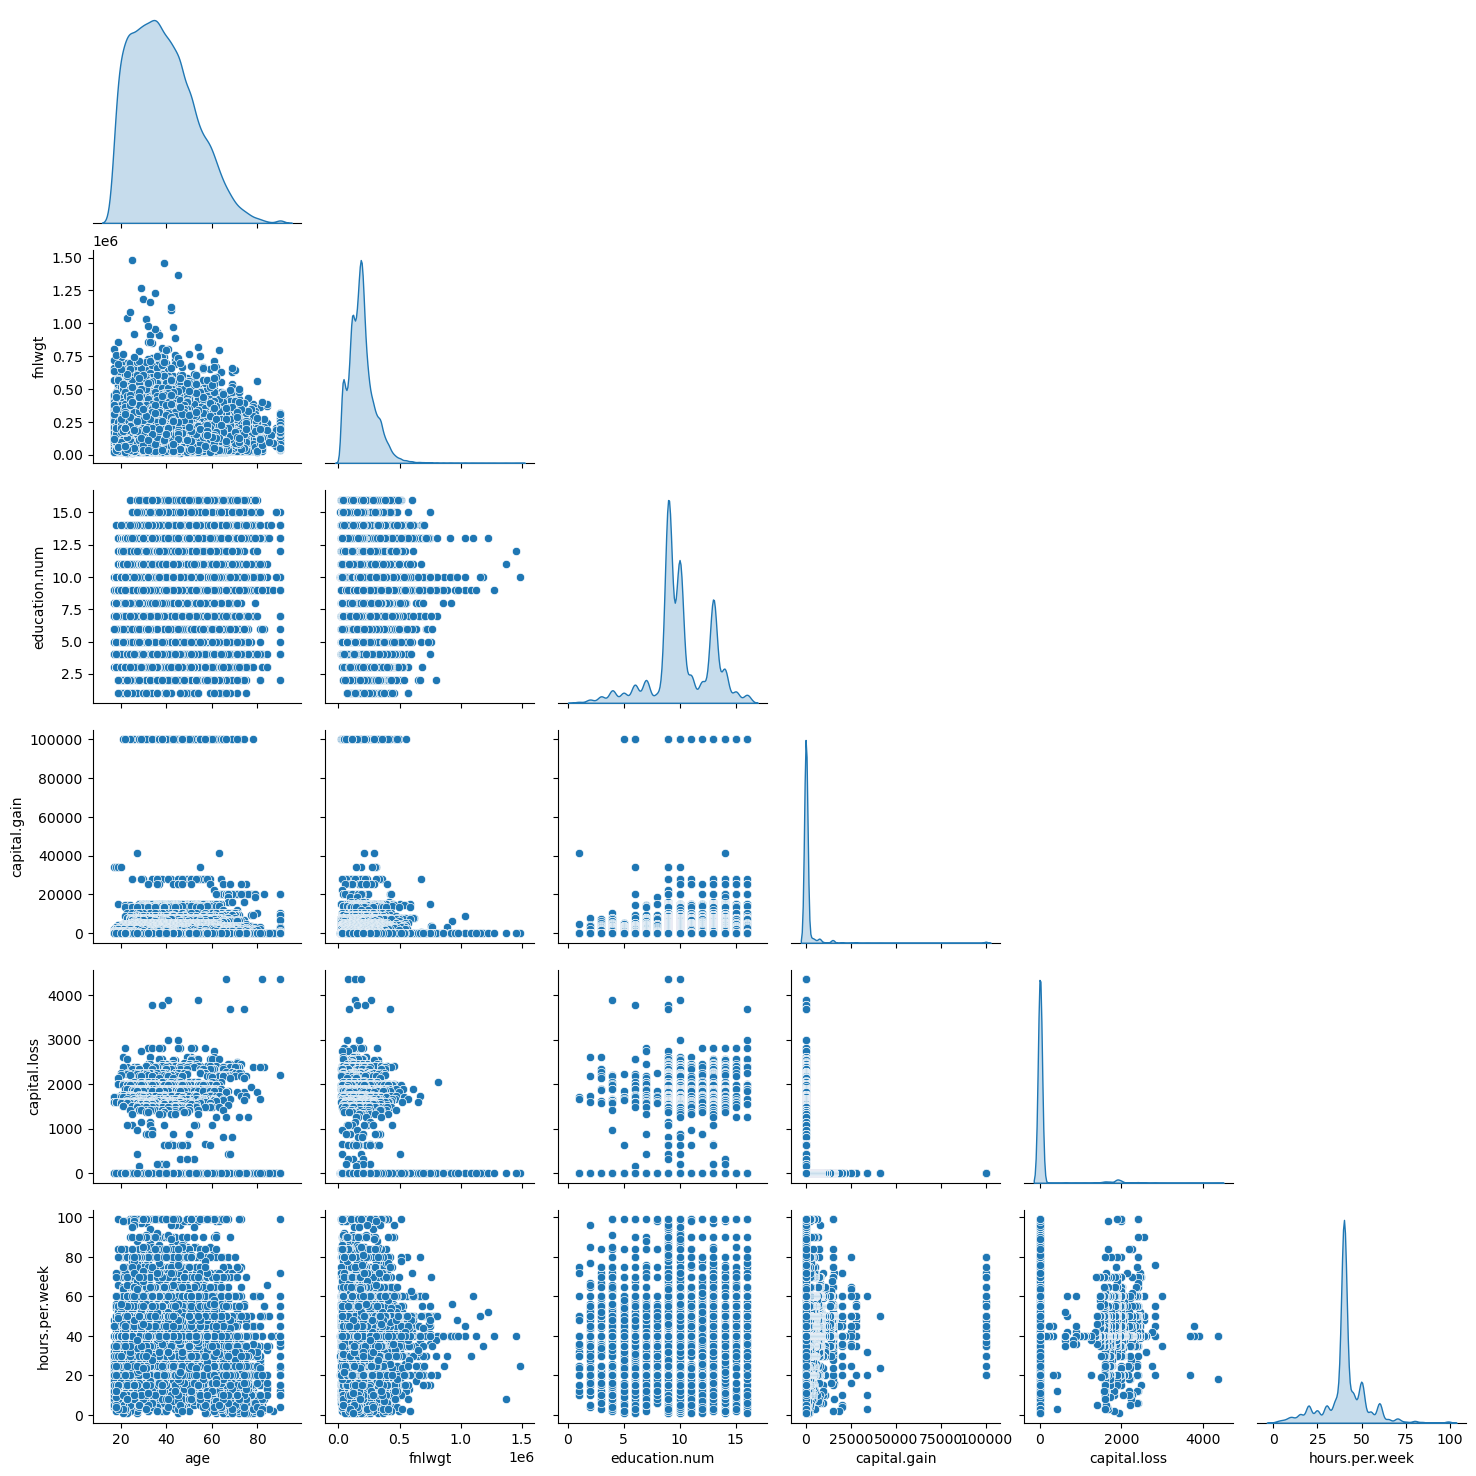

In [54]:
sns.pairplot(df[num_cols], corner=True, diag_kind="kde")
plt.show()



In [56]:
df.groupby(["income", "education"])["age"].mean().sort_values(ascending=False)


income  education   
>50K    7th-8th         52.725000
        1st-4th         52.000000
        10th            50.338710
        9th             48.814815
        Doctorate       48.591503
<=50K   7th-8th         48.163366
>50K    5th-6th         46.750000
<=50K   1st-4th         45.925926
>50K    Masters         45.450469
<=50K   Doctorate       45.158879
>50K    Prof-school     45.118203
        HS-grad         45.022090
        12th            44.696970
        Some-college    44.173756
<=50K   Prof-school     43.718954
>50K    11th            43.333333
<=50K   Preschool       42.764706
        5th-6th         42.690852
>50K    Bachelors       42.618190
        Assoc-voc       42.545706
<=50K   Masters         42.291885
>50K    Assoc-acdm      41.675472
<=50K   9th             40.630390
        HS-grad         37.826762
        Assoc-voc       37.142018
        10th            36.510907
        Bachelors       36.273452
        Assoc-acdm      35.962594
        Some-college    33.